<a href="https://colab.research.google.com/github/Csharpened/Linear-Regression-Model/blob/main/Linear_Regression_Model_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setting up the data
- Set up the data and fit it correctly for the neural network

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# https://github.com/stedy/Machine-Learning-with-R-datasets Link to use


np.set_printoptions(precision=3, suppress=True)

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

column_names = ["mpg", "cylinders", "replacement", "horsepower", "weight", "acceleration", "model_year", "origin"]

raw_data = pd.read_csv(url, names = column_names, na_values = "?",  comment='\t', sep = ' ', skipinitialspace = True)
raw_data

,mpg,cylinders,replacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
raw_data.describe().transpose() # Get more info with the data given

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
replacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model_year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [ ]:
raw_data.isna().sum() #Checking if there are nan values in an rows (counting them)

mpg             0
cylinders       0
replacement     0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [ ]:
raw_data = raw_data.dropna() # Getting rid of those nan values

In [ ]:
raw_data.isna().sum()

mpg             0
cylinders       0
replacement     0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64

In [ ]:
mpg_features = raw_data.drop("mpg", axis = 1)
mpg_features

,cylinders,replacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1
394,4,97.0,52.0,2130.0,24.6,82,2
395,4,135.0,84.0,2295.0,11.6,82,1
396,4,120.0,79.0,2625.0,18.6,82,1


In [ ]:
mpg_labels = raw_data["mpg"]
mpg_labels

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64

In [ ]:
mpg_features.head()

,cylinders,replacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
mpg_labels.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [ ]:
# No Encoding needed beacuse there are no non-numerical labels in the features

### Lets Make some Training and Testing data

In [ ]:
len(mpg_features), len(mpg_labels)

(392, 392)

In [ ]:
mpg_train_features, mpg_test_features, mpg_train_labels, mpg_test_labels = train_test_split(mpg_features, mpg_labels, test_size = 0.2, random_state = 42)

In [ ]:
len(mpg_train_features), len(mpg_test_features), len(mpg_train_labels), len(mpg_test_features)

(313, 79, 313, 79)

In [ ]:
mpg_train_features.head()

,cylinders,replacement,horsepower,weight,acceleration,model_year,origin
260,6,225.0,110.0,3620.0,18.7,78,1
184,4,140.0,92.0,2572.0,14.9,76,1
174,6,171.0,97.0,2984.0,14.5,75,1
64,8,318.0,150.0,4135.0,13.5,72,1
344,4,86.0,64.0,1875.0,16.4,81,1


In [ ]:
mpg_train_labels.head()

260    18.6
184    25.0
174    18.0
64     15.0
344    39.0
Name: mpg, dtype: float64

### Neural Network Regession models

In [ ]:
# Sequential Model number 1

tf.random.set_seed(42)

mpg_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], "mpg_model_1")

mpg_model_1.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                        metrics = tf.keras.losses.mse)

mpg_model_1.fit(mpg_train_features, mpg_train_labels, epochs = 100)

Epoch 1/100
10/10 [==============================] - 3s 10ms/step - loss: 231.1946 - mean_squared_error: 76078.4375
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 84.3021 - mean_squared_error: 9496.9629
Epoch 3/100
10/10 [==============================] - 0s 18ms/step - loss: 50.6171 - mean_squared_error: 3334.8948
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 16.6677 - mean_squared_error: 457.9620
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 10.1797 - mean_squared_error: 157.7057
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 6.8103 - mean_squared_error: 71.6128
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 7.1795 - mean_squared_error: 79.7915
Epoch 8/100
10/10 [==============================] - 0s 9ms/step - loss: 8.3987 - mean_squared_error: 102.3078
Epoch 9/100
10/10 [==============================] - 0s 10ms/step - loss: 5.0401 - mean_squared_error

In [ ]:
mpg_model_1.summary()

Model: "mpg_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                80        
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 91 (364.00 Byte)
Trainable params: 91 (364.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


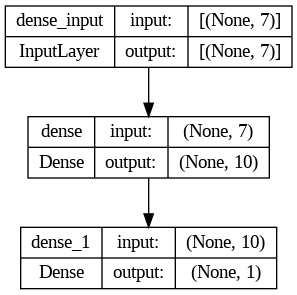

In [ ]:
tf.keras.utils.plot_model(mpg_model_1, show_shapes = True)

In [ ]:
# Evalutaing this mpg_model_1

mpg_model_1.evaluate(mpg_test_features, mpg_test_labels)

3/3 [==============================] - 0s 9ms/step - loss: 2.5995 - mean_squared_error: 11.5428


[2.5995376110076904, 11.542826652526855]

In [ ]:
mpg_model_1.predict(mpg_test_features.head())

1/1 [==============================] - 0s 88ms/step


array([[25.93 ],
       [24.722],
       [31.255],
       [27.559],
       [25.343]], dtype=float32)

In [ ]:
print(mpg_test_labels.head())

79     26.0
276    21.6
248    36.1
56     26.0
393    27.0
Name: mpg, dtype: float64


In [ ]:
# Improving the model
tf.random.set_seed(42)

mpg_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])

mpg_model_2.compile(loss = tf.keras.losses.mae,
                    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                    metrics = tf.keras.losses.mse)

mpg_fit = mpg_model_2.fit(mpg_train_features, mpg_train_labels, epochs = 100)


Epoch 1/100
10/10 [==============================] - 1s 5ms/step - loss: 1011.8841 - mean_squared_error: 1551618.3750
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 126.4183 - mean_squared_error: 25584.2695
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 92.3326 - mean_squared_error: 11045.3076
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 44.8513 - mean_squared_error: 2627.2278
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 23.0022 - mean_squared_error: 725.4153
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 13.0875 - mean_squared_error: 236.0731
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 10.7523 - mean_squared_error: 176.3560
Epoch 8/100
10/10 [==============================] - 0s 4ms/step - loss: 8.5206 - mean_squared_error: 115.9113
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 6.8753 - mean_square

In [ ]:
mpg_model_2.evaluate(mpg_test_features, mpg_test_labels)

3/3 [==============================] - 0s 5ms/step - loss: 3.7889 - mean_squared_error: 19.8052


[3.788904905319214, 19.80519676208496]

In [ ]:
mpg_model_2.predict(mpg_test_features.head() )

1/1 [==============================] - 0s 67ms/step


array([[27.454],
       [27.515],
       [31.855],
       [28.075],
       [27.819]], dtype=float32)

In [ ]:
mpg_test_labels.head()

79     26.0
276    21.6
248    36.1
56     26.0
393    27.0
Name: mpg, dtype: float64

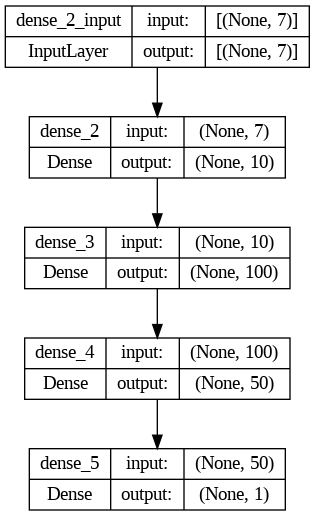

In [ ]:
tf.keras.utils.plot_model(mpg_model_2, show_shapes = True)

### Visualizing the Data we have so far

Text(0.5, 0, 'epochs')

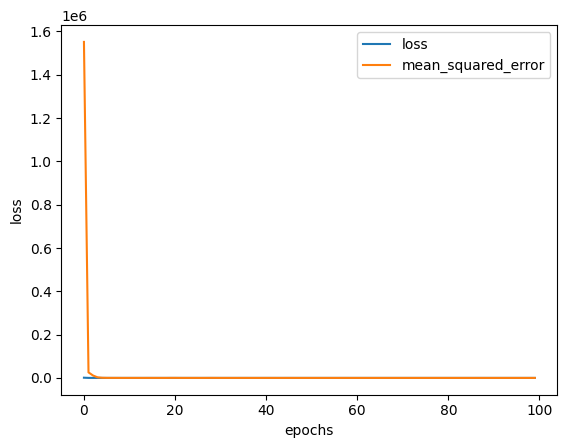

In [ ]:
# Plot History (Loss / Training Curve)

pd.DataFrame(mpg_fit.history).plot()

plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
mpg_features

,cylinders,replacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1
394,4,97.0,52.0,2130.0,24.6,82,2
395,4,135.0,84.0,2295.0,11.6,82,1
396,4,120.0,79.0,2625.0,18.6,82,1


<Axes: ylabel='Frequency'>

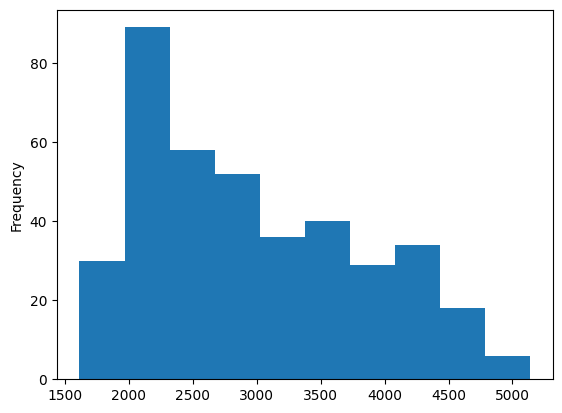

In [ ]:
mpg_features["weight"].plot(kind = "hist")

<Axes: ylabel='Frequency'>

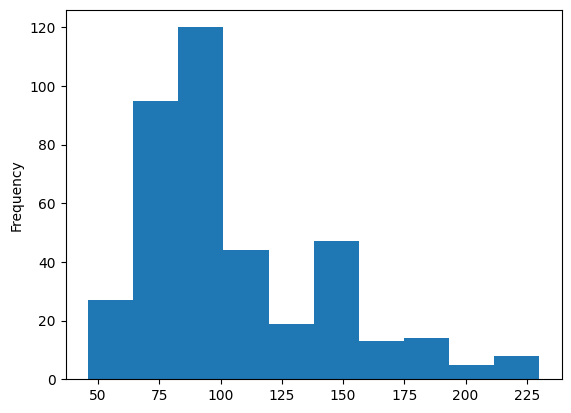

In [ ]:
mpg_features["horsepower"].plot(kind = "hist")

<Axes: ylabel='Frequency'>

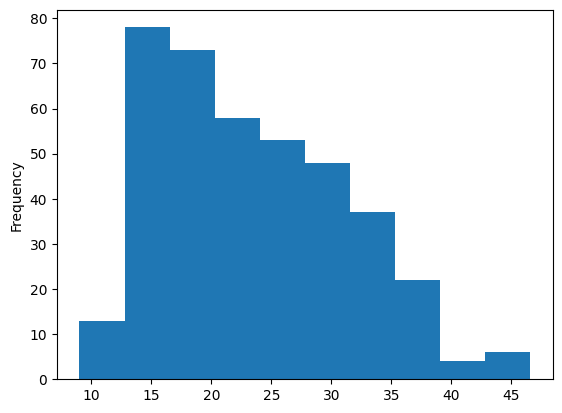

In [ ]:
mpg_labels.plot(kind = "hist")

### Normalizing the data for better results

In [ ]:
scaler = MinMaxScaler()

mpg_train_features, mpg_test_features, mpg_train_labels, mpg_test_labels = train_test_split(mpg_features, mpg_labels, test_size = 0.2, random_state = 42)
scaler.fit(mpg_train_features)

mpg_train_features_normal = scaler.transform(mpg_train_features)
mpg_test_features_normal = scaler.transform(mpg_test_features)


In [ ]:
mpg_train_features_normal[0]

array([0.6  , 0.403, 0.348, 0.569, 0.637, 0.667, 0.   ])

### Making a model on the normalized data

In [ ]:
mpg_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(1)
])


mpg_model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = tf.losses.mse
)

mpg_model_3.fit(mpg_train_features_normal, mpg_train_labels, epochs = 100)


Epoch 1/100
10/10 [==============================] - 1s 3ms/step - loss: 16.6629 - mean_squared_error: 368.3489
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 6.4617 - mean_squared_error: 70.6015
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 4.0627 - mean_squared_error: 25.8420
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 3.3305 - mean_squared_error: 17.9272
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 3.0374 - mean_squared_error: 16.0897
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 2.9479 - mean_squared_error: 15.5283
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 2.9005 - mean_squared_error: 14.4895
Epoch 8/100
10/10 [==============================] - 0s 3ms/step - loss: 2.8443 - mean_squared_error: 13.9179
Epoch 9/100
10/10 [==============================] - 0s 3ms/step - loss: 2.9701 - mean_squared_error: 15.6781
Epoch 10

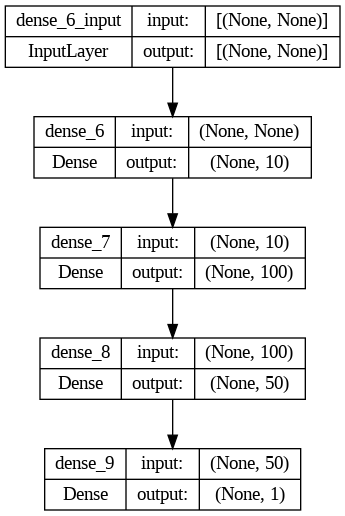

In [ ]:
tf.keras.utils.plot_model(mpg_model_3, show_shapes = True)

In [ ]:
mpg_model_2_mae = mpg_model_2.evaluate(mpg_test_features, mpg_test_labels)
mpg_model_3_mae = mpg_model_3.evaluate(mpg_test_features_normal, mpg_test_labels)

3/3 [==============================] - 0s 5ms/step - loss: 2.3503 - mean_squared_error: 10.9272


In [ ]:
mpg_model_2_mae, mpg_model_3_mae

([3.788904905319214, 19.80519676208496],
 [2.350348711013794, 10.927210807800293])

### Final analysis

In [ ]:
model_predictions = mpg_model_3.predict(mpg_test_features_normal).flatten()
model_predictions

3/3 [==============================] - 0s 3ms/step


array([25.392, 25.889, 33.075, 23.918, 26.859, 29.941,  9.042, 29.901,
       19.593, 27.645, 12.91 , 25.343, 15.79 , 29.264, 22.124, 27.456,
       19.693, 32.074, 25.644, 28.882, 18.61 , 31.642, 33.972, 14.778,
       27.902, 25.609, 21.248, 16.177, 27.222, 23.775, 13.049, 21.711,
       19.645, 30.592, 11.868, 34.54 , 11.261, 23.831, 11.733,  8.468,
       12.934, 27.131, 32.795, 26.224, 11.974, 10.086, 17.086, 30.235,
       23.082, 29.353, 11.95 , 26.752, 22.613, 33.697, 26.03 , 16.946,
       19.289, 21.309, 23.038, 26.474,  8.951, 21.066, 24.804, 23.371,
       29.388, 27.728, 24.716, 28.743, 20.307, 10.376, 21.835, 13.298,
       26.678, 28.533, 22.373, 23.768, 13.653, 14.949, 26.339],
      dtype=float32)

In [ ]:
test_values = mpg_test_labels
test_values

79     26.0
276    21.6
248    36.1
56     26.0
393    27.0
       ... 
366    17.6
83     28.0
115    15.0
3      16.0
18     27.0
Name: mpg, Length: 79, dtype: float64

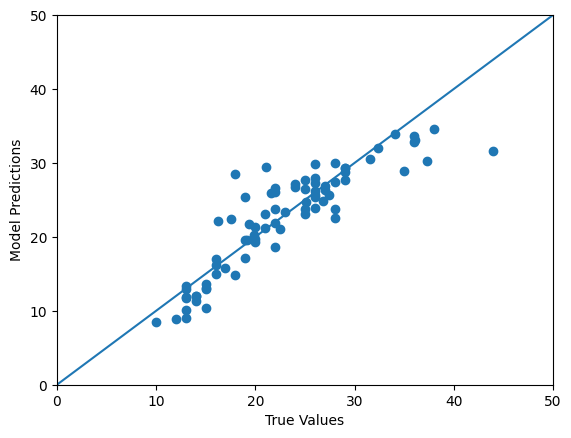

In [ ]:
plt.scatter(test_values, model_predictions)
plt.xlabel("True Values")
plt.ylabel("Model Predictions")
limitations = [0, 50]
plt.xlim(limitations)
plt.ylim(limitations)
_ = plt.plot(limitations, limitations)

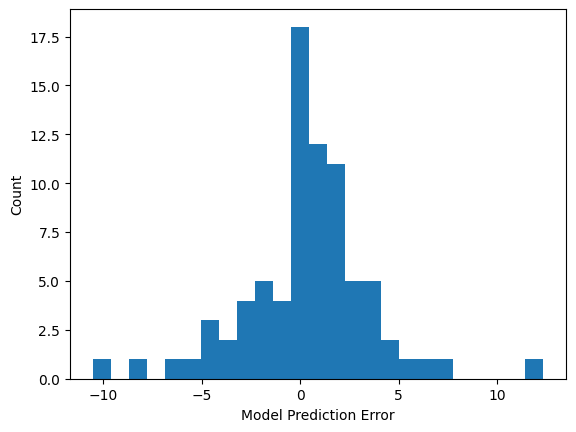

In [ ]:
# Error disribution
error =  test_values - model_predictions
plt.hist(error, bins = 25)
plt.xlabel("Model Prediction Error")
_ = plt.ylabel('Count')

- mpg_model_3 was the best model I could form
- An mae (mean absolute error) of about 2.350348711013794
- An mse (mean squared error) of about 10.927210807800293
- Keep in mind I also only put the model through 100 epochs
- Specifically uses Sequential model set and the Adam optimizer with a learning rate of 0.01
- Includes 4 layers (excluding input layer)